In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

import os
import cv2

In [3]:
import warnings
warnings.filterwarnings("ignore")

import sys
print("Python Version: ", sys.version)
print("Tensorflow Version: ", tf.__version__)

Python Version:  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow Version:  2.16.1


In [4]:
# DEFINED
BATCH_SIZE = 32
IMG_WIDTH  = 224
IMG_HEIGHT = 224

NUM_IMAGES_TO_SHOW = 100

In [5]:
# Load model
model = keras.models.load_model("../TrainingModels/self_built_model1.keras")

In [6]:
furniture_df = pd.read_csv("../furniture_data.csv")
shuffled_furniture_df = furniture_df.sample(frac=1).reset_index(drop=True)

In [7]:
# Print the DataFrame head 
print("First few rows of the shuffled furniture data:")
print(shuffled_furniture_df.head())

First few rows of the shuffled furniture data:
  Furniture_Category Furniture_Type  \
0              lamps         Modern   
1             chairs   Transitional   
2              sofas    Traditional   
3             tables    Traditional   
4             tables     Industrial   

                                          Image_Path  
0  ../Furniture_Data\lamps\Modern\6815modern-floo...  
1  ../Furniture_Data\chairs\Transitional\22476tra...  
2  ../Furniture_Data\sofas\Traditional\3174tradit...  
3  ../Furniture_Data\tables\Traditional\15722trad...  
4  ../Furniture_Data\tables\Industrial\34738indus...  


In [8]:
# Test dataset processing
def prepare(filepath):
    img_array = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
    return np.expand_dims(new_array, axis=0)  

test_images = []

In [9]:
test_images = []

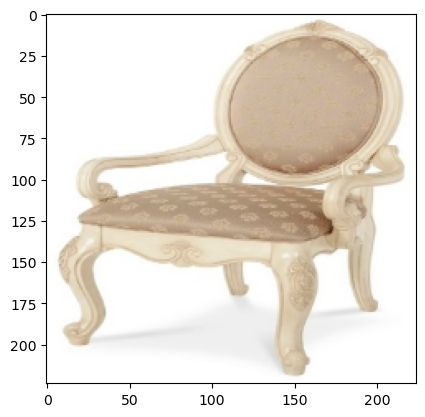

In [10]:
# Add images for testing
for i in range(NUM_IMAGES_TO_SHOW):
    image_path = shuffled_furniture_df.iloc[i]['Image_Path']
    img_arr = prepare(image_path)
    test_images.append(img_arr)

# Check preprocessed image (using a different index for variety)
plt.imshow(test_images[42][0])
plt.show()

In [11]:
# Get unique furniture categories
categorical_folders = furniture_df["Furniture_Category"].unique()
print("Unique Furniture Categories:")
print(categorical_folders)

Unique Furniture Categories:
['beds' 'chairs' 'dressers' 'lamps' 'sofas' 'tables']


In [12]:
# --- Single Prediction ---

# Choose an image from the shuffled dataframe (e.g., the 20th image)
image_index = 19 
image_path = shuffled_furniture_df.iloc[image_index]['Image_Path']
img_arr = prepare(image_path)

# Predict using a batch of one, as the model expects a batch
prediction = model.predict(np.repeat(img_arr, BATCH_SIZE, axis=0))  
predicted_class_index = np.argmax(prediction, axis=1)[0]  # Take the first prediction from the batch

predicted_label = categorical_folders[predicted_class_index]
actual_label = shuffled_furniture_df.iloc[image_index]['Furniture_Category']

print(f'Predicted: {predicted_label}')
print(f'Actual: {actual_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted: chairs
Actual: chairs


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━

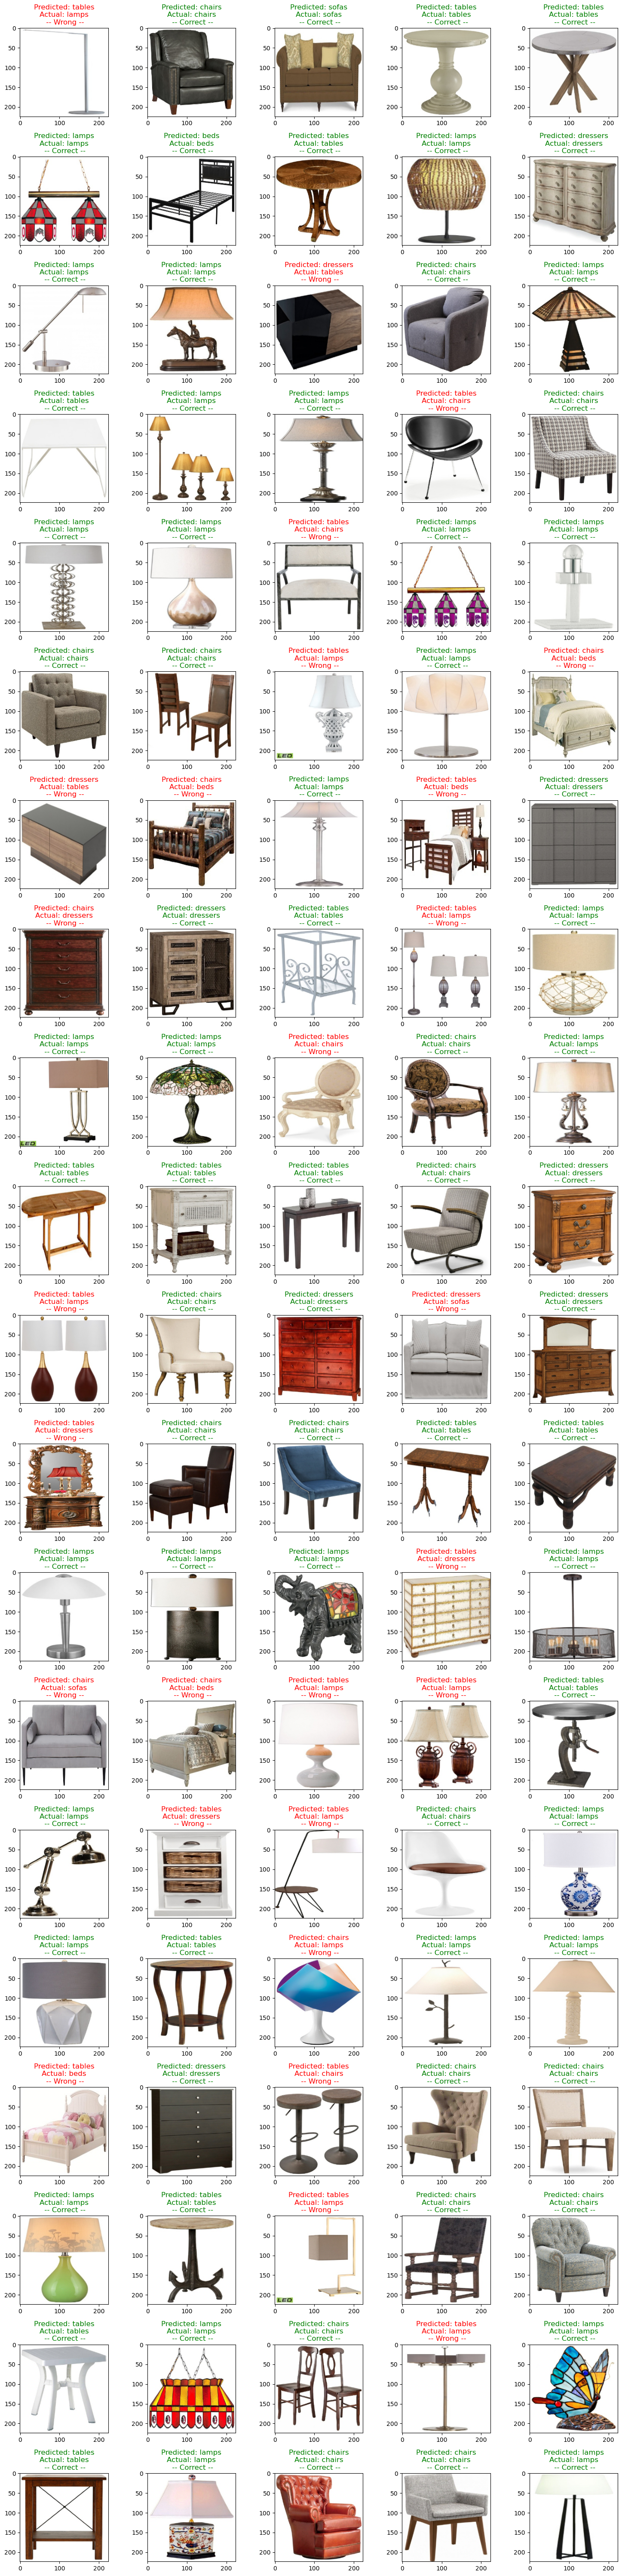

Total correct predictions: 73/100
Accuracy: 73.00%


In [13]:
# --- Multiple Predictions ---

num_rows = (NUM_IMAGES_TO_SHOW + 4) // 5
num_cols = min(NUM_IMAGES_TO_SHOW, 5)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

correct_predictions = 0

for i, ax in enumerate(axes.flat):
    if i < NUM_IMAGES_TO_SHOW:
        img_arr = test_images[i]

        # Predict using a batch of one
        prediction = model.predict(np.repeat(img_arr, BATCH_SIZE, axis=0)) 
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_label = categorical_folders[predicted_class_index]

        actual_label = shuffled_furniture_df.loc[i, 'Furniture_Category']

        # Check for correctness
        is_correct = predicted_label == actual_label
        correct_predictions += is_correct

        color = 'green' if is_correct else 'red'

        ax.imshow(img_arr[0])
        ax.set_title(f'Predicted: {predicted_label}\nActual: {actual_label}\n -- {"Correct" if is_correct else "Wrong"} --', color=color)

        fig.canvas.draw()  # Redraw the figure
        fig.canvas.flush_events()  # Ensure the redraw is displayed

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()  # Now show the complete plot 

accuracy = correct_predictions / NUM_IMAGES_TO_SHOW
print(f"Total correct predictions: {correct_predictions}/{NUM_IMAGES_TO_SHOW}")
print(f"Accuracy: {accuracy * 100:.2f}%")